# **Tree based methods - outcome_profit**

# 0. Mount to drive, loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('train_V2_cleaned.csv', index_col=[0])

In [2]:
df_test = pd.read_csv('score_cleaned.csv', index_col=[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 1090 to 1304
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4912 non-null   float64
 1   profit_last_am         4912 non-null   float64
 2   profit_am              4912 non-null   float64
 3   damage_am              4912 non-null   float64
 4   damage_inc             4912 non-null   float64
 5   crd_lim_rec            4912 non-null   float64
 6   credit_use_ic          4912 non-null   float64
 7   gluten_ic              4912 non-null   float64
 8   lactose_ic             4912 non-null   float64
 9   insurance_ic           4912 non-null   float64
 10  spa_ic                 4912 non-null   float64
 11  empl_ic                4912 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             4912 non-null   float64
 14  bar_no                 4912 non-null   float64
 15  s

# 0.1 X/Y-split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from random import Random

X = df.drop(['outcome_profit', 'outcome_damage_amount', 'outcome_damage_inc'], 1)
y_profit = df['outcome_profit']

X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=123)

__note__: Standardization already happened in pre-processing

In [5]:
X_train_profit.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0
3780,-0.079047,0.518507,-0.609458,-0.409033,-0.452286,-1.094296,-0.20816,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4586,1.113224,1.370074,1.087099,-0.409033,-0.452286,-1.094296,-0.20816,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,0,0
3261,1.009282,0.873504,0.096767,-0.409033,-0.452286,-1.094296,-0.20816,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
3457,-0.916414,0.990866,-0.688244,-0.409033,-0.452286,-1.094296,-0.20816,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
192,-0.916414,-1.142158,-0.619959,-0.409033,-0.452286,0.802621,-0.20816,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
X_train_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3929 entries, 31 to 1896
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income_am           3929 non-null   float64
 1   profit_last_am      3929 non-null   float64
 2   profit_am           3929 non-null   float64
 3   damage_am           3929 non-null   float64
 4   damage_inc          3929 non-null   float64
 5   crd_lim_rec         3929 non-null   float64
 6   credit_use_ic       3929 non-null   float64
 7   gluten_ic           3929 non-null   float64
 8   lactose_ic          3929 non-null   float64
 9   insurance_ic        3929 non-null   float64
 10  spa_ic              3929 non-null   float64
 11  empl_ic             3929 non-null   float64
 12  cab_requests        3929 non-null   float64
 13  married_cd          3929 non-null   float64
 14  bar_no              3929 non-null   float64
 15  sport_ic            3929 non-null   float64
 16  neigh

# 1. Decision trees

Perform a decision tree with a max depth of 12 because 2^12 > 3929

In [15]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score

depth = np.arange(1,13)    # This will give an array of numbers between 1 and 13
cv_scores = []
sd_scores = []

for d in depth:
    dec_tree = DecisionTreeRegressor(random_state = 123, max_depth=d)  
    scores = cross_val_score(dec_tree, X_train_profit, y_train_profit,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

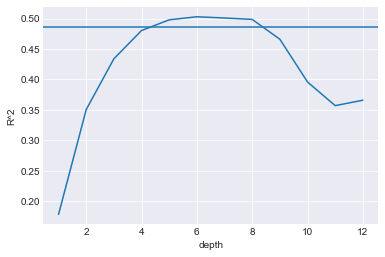

The best depth is 6


In [16]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best depth is', depth[max_index])

5 is the best model to predict the profit outcome, it's also the most simple model.

In [19]:
from sklearn import tree 

dec_tree_profit = DecisionTreeRegressor(random_state = 123, max_depth=5)  
dec_tree_profit.fit(X_train_profit, y_train_profit) 
print(dec_tree_profit.score(X_train_profit, y_train_profit))

0.5537430622601316


# 2. Random forest

# 2.1 Random search

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 400)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf_profit = RandomForestRegressor()
rf_profit_random = RandomizedSearchCV(estimator = rf_profit, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=20, random_state=42, n_jobs=-1)
rf_profit_random.fit(X_train_profit, y_train_profit)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [1, 2, 3, 

## 2.2 Test best model

In [40]:
print(rf_profit_random.score(X_train_profit, y_train_profit))

0.7280740622737641


## 2.3 Print out the parameters of the best model

In [41]:
rf_profit_random.best_params_

{'n_estimators': 238,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 124,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

## 2.4 Plot all the results for the hyperparameters

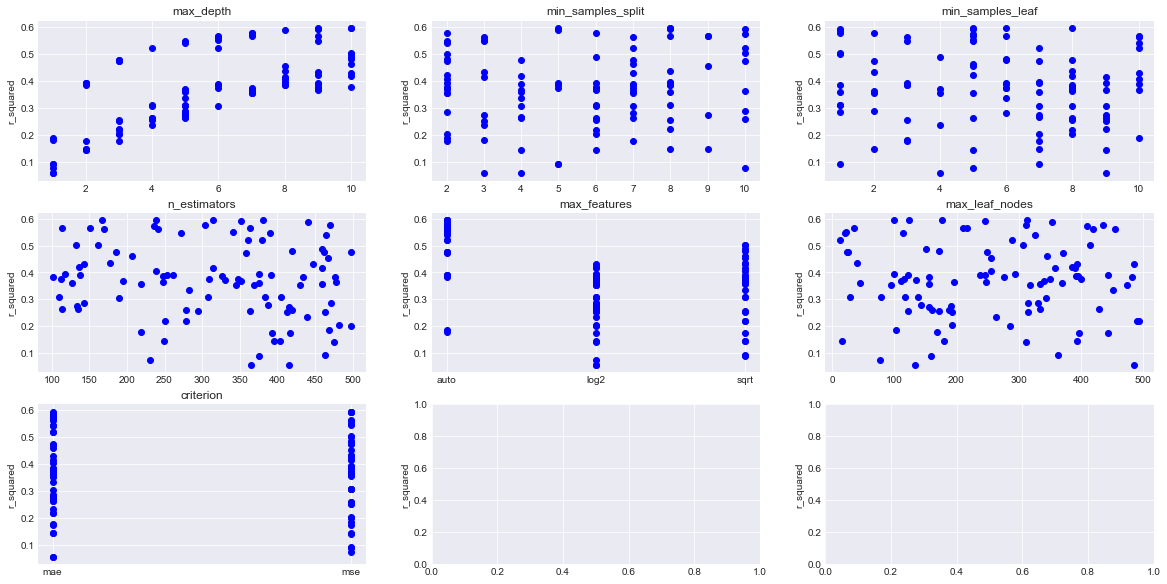

In [42]:
out = pd.DataFrame(rf_profit_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

In [43]:
out = out[out.mean_test_score > 0.5]

__note__: Plots downstairs are only the results where the R2 is above 0.5

### 2.4.1 The results for max_depth where R2 is above 0.5

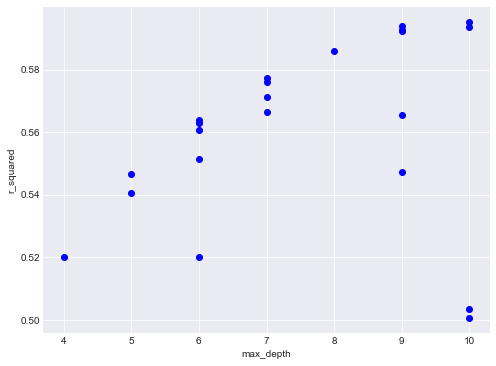

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_depth");
ax.set_ylabel("r_squared");

We can see that the best depth is 10, but 9 does not perform much worse. We prefer models that are less complex. Here, that means models that are less deep. So, we chose 9 and 10 to go in the grid search.

### 2.4.2 The results for min_samples_split where R2 is above 0.5

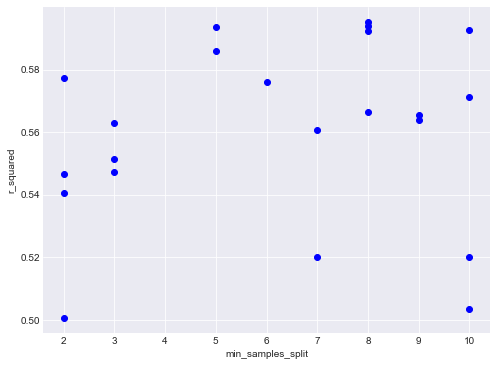

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_split");
ax.set_ylabel("r_squared");

We can see that the best value is 8, but 5 and 10 do not perform much worse. We prefer models that are less complex. Here, that means models that have a higher minimum number of samples to allow splitting. So, we chose 5, 8 and 10 to go in the grid search.

### 2.4.3 The results for min_samples_leaf where R2 is above 0.5

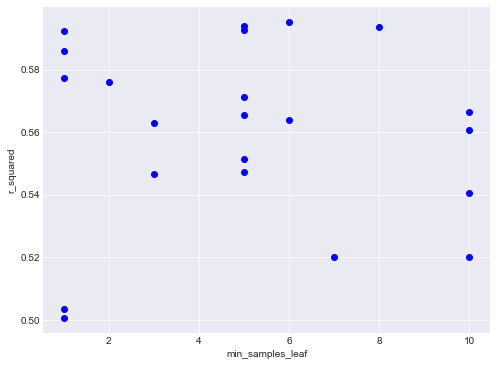

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_leaf");
ax.set_ylabel("r_squared");

6 leads to the best R2, but 8 is not that much worse. We prefer a higher number of samples in a leaf because it makes the model less complex. So, we chose 6 and 8 to go in the grid search.

### 2.4.4 The results for n_estimators where R2 is above 0.5

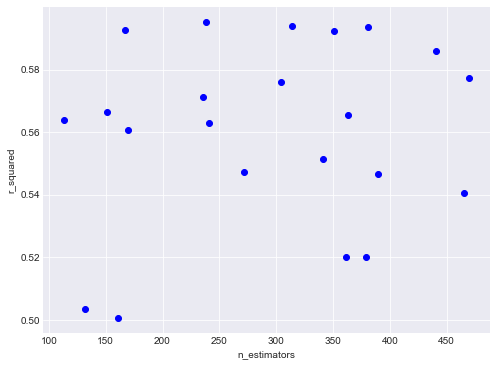

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
ax.set_xlabel("n_estimators");
ax.set_ylabel("r_squared");

The best value was with 238 trees. We onlly chose 238 to add to the grid search.

### 2.4.5 The results for max_features where R2 is above 0.5

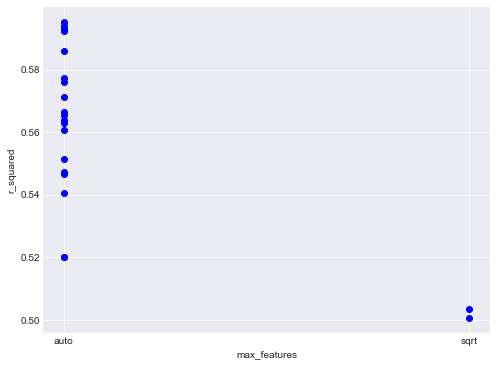

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_features'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_features");
ax.set_ylabel("r_squared");

Auto clearly wins here, so let's just go with that.

### 2.4.6 The results for max_leaf_nodes where R2 is above 0.5

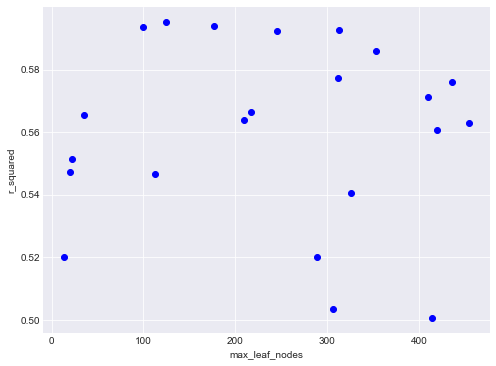

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_leaf_nodes");
ax.set_ylabel("r_squared");

The best max_leaf_nodes was 124. So, we chose only 124 to add to the grid search.

### 2.4.7 The results for criterion where R2 is above 0.5

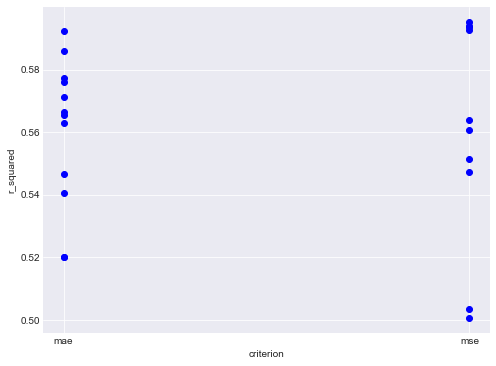

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_criterion'], out['mean_test_score'], c='blue');
ax.set_xlabel("criterion");
ax.set_ylabel("r_squared");

Mse had the best score, we only add 'mse' to the grid search.

## 2.5 Grid search

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse']
n_estimators = [238]
max_features = ['auto']
max_depth = [9,10]
min_samples_split = [5,8,10]
min_samples_leaf = [6,8]
max_leaf_nodes = [124]

grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
                'max_leaf_nodes': max_leaf_nodes,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                               cv = 5, verbose=10,  n_jobs=-1)

rf_grid.fit(X_train_profit, y_train_profit)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [9, 10],
                         'max_features': ['auto'], 'max_leaf_nodes': [124],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 8, 10],
                         'n_estimators': [238]},
             verbose=10)

In [52]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 124,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 238}

What has been imporved by the grid search. Only the min_samples_split has been changed from 8 tot 10. This makes for a less complex model which makes for less bias and variance. 

In [53]:
params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(X_train_profit, y_train_profit)
print('R2: %.3f' % rf_gridBest.score(X_train_profit, y_train_profit))

R2: 0.727


The R2 decreased slightly. This is because the model has become less complex. We hope to better predict the test-dataset this way.

# 3. Whitening the black box

##  3.1 Which features are important?

In [54]:
list(zip(X_train_profit.columns, rf_gridBest.feature_importances_))

[('income_am', 0.02876238953242278),
 ('profit_last_am', 0.014982008080961041),
 ('profit_am', 0.32419542614330954),
 ('damage_am', 0.05436032729321538),
 ('damage_inc', 0.0035449623613679933),
 ('crd_lim_rec', 0.007011673531947207),
 ('credit_use_ic', 0.0010566324918233597),
 ('gluten_ic', 6.581631561206285e-05),
 ('lactose_ic', 0.0007024586978275782),
 ('insurance_ic', 0.0030860061314144913),
 ('spa_ic', 0.0025917723009084687),
 ('empl_ic', 0.00022616123574497696),
 ('cab_requests', 0.021956122713457985),
 ('married_cd', 0.0009245080752992291),
 ('bar_no', 0.007146278350093109),
 ('sport_ic', 0.0015623316991980236),
 ('neighbor_income', 5.365260803011576e-05),
 ('age', 0.019143551809872737),
 ('marketing_permit', 0.00385194145136813),
 ('urban_ic', 0.007832914353338587),
 ('dining_ic', 0.00010515393449985205),
 ('presidential', 0.0010421559704465238),
 ('prev_stay', 0.00567071385967688),
 ('prev_all_in_stay', 0.0010349097464146405),
 ('divorce', 0.0005797677112855909),
 ('fam_adult_s

This is not easy to read, so it is better to plot this. But first, let's check if the sum of all feature importances is indeed 1.

In [55]:
rf_gridBest.feature_importances_.sum()

1.0

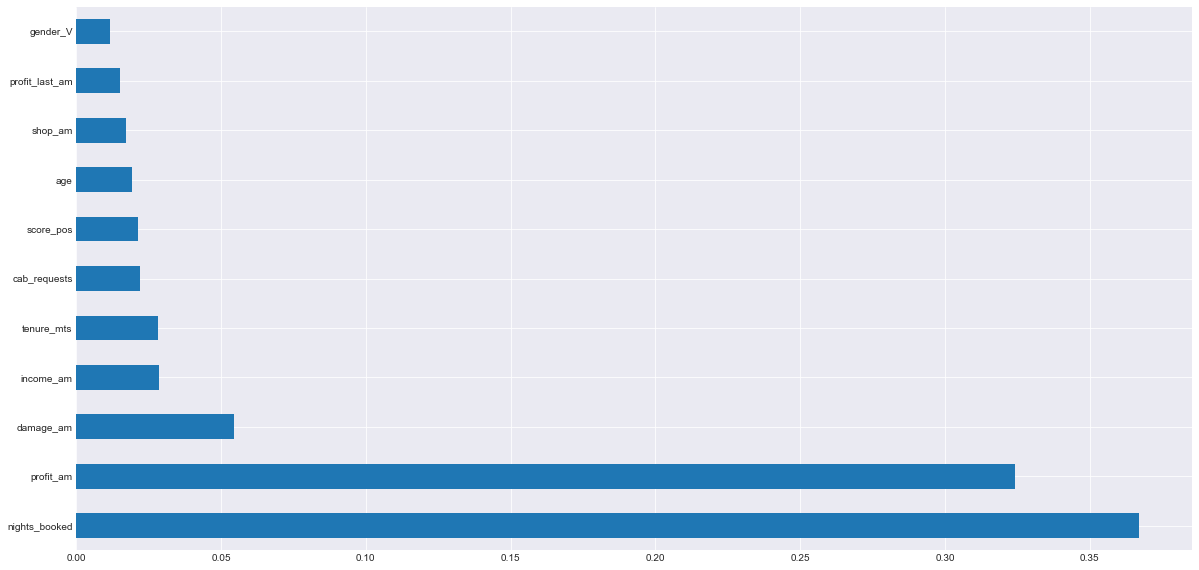

In [56]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

So, the four features that seem to have the most influence in our algorithm are income_am, damage_am, nights_booked and profit_am.

These predictions seems logical in context. The number of bookings and the profit made by the previous(other than the last) hotels play an important role in this prediction. The longer you stay, the more you have to pay also speaks for itself. Also the more you earn, the less you hurt yourself to spend a little more in a hotel. 
But we are carefull with making assumptions like that. There is always a chance that we are wrong. So we have to check the directions of the influences.

### 3.2 What is the influence of a certain feature?

In [57]:
pred_train =rf_gridBest.predict(X_train_profit)

In [58]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(X_train_profit)
X.columns = X_train_profit.columns
predictors =  X_train_profit.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])
for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)
betas


,0,1
0,income_am,0.254469
0,profit_last_am,0.091533
0,profit_am,0.352298
0,damage_am,0.133870
0,damage_inc,0.072385
0,crd_lim_rec,-0.232554
0,credit_use_ic,0.005160
0,gluten_ic,0.533617
0,lactose_ic,0.579169
0,insurance_ic,-0.229077


## 3.3 Why is a prediction what it is?

In [6]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_profit.values, mode="regression", feature_names=X_train_profit.columns)

i = 100
X_train_profit = pd.DataFrame(X_train_profit)
X_train_profit.columns = X_train_profit.columns

X_observation = X_train_profit.iloc[[i], :]

In [7]:
explanation = explainer.explain_instance(X_observation.values[0], rf_gridBest.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

NameError: name 'rf_gridBest' is not defined

# 4. Gradient boosting

## 4.1 Perform random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=10, random_state=42, n_jobs=-1)
gbm_random.fit(X_train_profit, y_train_profit)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


## 4.2Test best model

In [67]:
print(gbm_random.score(X_train_profit, y_train_profit))

0.7857231392874606


We have a very high R2. This is perfectly possible because we are dealing with the best algorithm here. Hopefully we will get a similar result after our grid search.Let's also hope for our test data set.

## 4.3 Print out the parameters of the best model

In [68]:
gbm_random.best_params_

{'n_estimators': 255,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_leaf_nodes': 190,
 'max_features': 'auto',
 'max_depth': 3,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'mse'}

## 4.4 Plot the results of the hyperparameters

In [69]:
out = pd.DataFrame(gbm_random.cv_results_)
out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,...,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,91.675040,3.080175,0.012201,0.000980,442,10,9,40,sqrt,2,...,mae,"{'n_estimators': 442, 'min_samples_split': 10,...",0.532730,0.610171,0.556280,0.529727,0.580716,0.561925,0.030337,37
1,161.179280,4.657824,0.030802,0.001165,255,4,5,500,sqrt,14,...,mae,"{'n_estimators': 255, 'min_samples_split': 4, ...",0.437711,0.493908,0.464487,0.456670,0.468212,0.464198,0.018205,58
2,10.520419,0.546005,0.013440,0.001431,214,14,15,330,auto,6,...,mse,"{'n_estimators': 214, 'min_samples_split': 14,...",0.444839,0.510153,0.477561,0.540980,0.489405,0.492588,0.032144,51
3,90.585656,2.745388,0.012830,0.000506,328,11,13,460,sqrt,3,...,mae,"{'n_estimators': 328, 'min_samples_split': 11,...",0.640423,0.666975,0.634082,0.610176,0.668586,0.644048,0.021852,3
4,146.581414,3.957546,0.031461,0.002845,402,15,1,70,log2,13,...,mae,"{'n_estimators': 402, 'min_samples_split': 15,...",0.505241,0.563923,0.530763,0.562850,0.566371,0.545830,0.024139,42


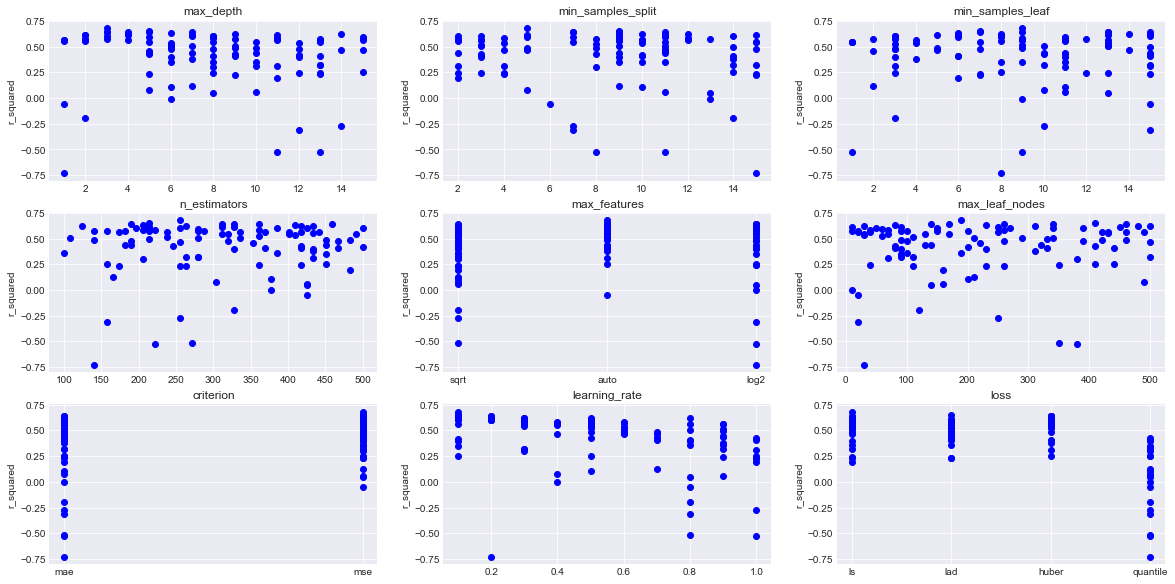

In [70]:
out2 = out

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

It is hard to see anything on these graphs. We will zoom in on the R^2 above 0.6.

__note__: We don't choose a R2 of 0.6 because otherwise we can't declare why to choose and try that hyperparameter.

In [71]:
out2 = out[out.mean_test_score > 0.6]

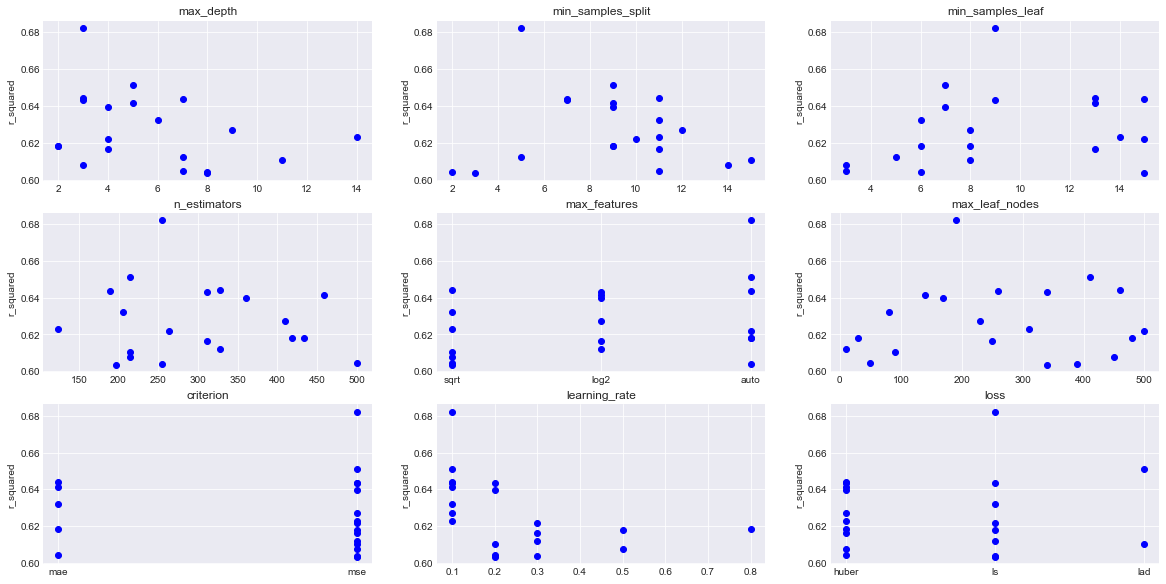

In [72]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

## 4.5 Grid search

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse']
n_estimators = [255]
max_features = ['auto']
max_depth = [3, 5]
min_samples_split = [5,9]
min_samples_leaf = [9,7]
max_leaf_nodes = [190]
learning_rate = [0.1,0.2]
loss = ['lad','ls']

grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 5, verbose=10,  n_jobs=-1)
gbm_grid.fit(X_train_profit, y_train_profit)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1, 0.2],
                         'loss': ['lad', 'ls'], 'max_depth': [3, 5],
                         'max_features': ['auto'], 'max_leaf_nodes': [190],
                         'min_samples_leaf': [9, 7],
                         'min_samples_split': [5, 9], 'n_estimators': [255]},
             verbose=10)

In [74]:
gbm_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 190,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 255}

In [76]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train_profit, y_train_profit)
print('R2: %.3f' % gbm_gridBest.score(X_train_profit, y_train_profit))

R2: 0.786


# 5. choosing and using the best model

We can destract from the R2 scores that gbm is our best model. Now we will use this model on score_cleaned.csv and put the results in a other data set, so score_cleaned is still useable for other models.

In [79]:
outcome_profit = gbm_gridBest.predict(df_test)

In [80]:
df_result = df_test.copy()
df_result['outcome_profit'] = outcome_profit
df_result.to_csv('score_with_profit_results.csv')